> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This dataset is a about more than 100k of patients that make an appointment to visit a doctor but didn't come <br>
> why they didn't come?<br>
> who to blame?<br>
> how can we predict if patient will come or not?
Data Columns:<br>
Data Columns:<br>
    01 - PatientId :
    Identification of a patient<br>
    02 - AppointmentID :
    Identification of each appointment<br>
    03 - gender :
    Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.<br>
    04 - Data Marcacao Consulta :
    The day of the actuall appointment, when they have to visit the doctor.<br>
    05 - DataAgendamento :
    The day someone called or registered the appointment, this is before appointment of course.<br>
    06 - age:
    How old is the patient.<br>
    07 - Neighbourhood :
    Where the appointment takes place.<br>
    08 - Scholarship:
    True of False . Observation, this is a broad topic, consider reading this article <a href=' https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia'>here</a>
    <br>09 - Hipertension :
    True or False<br>
    10 - Diabetes :
    True or False <br>
    11-Alcoholism:
    True or False<br>
    12-Handcap (disability) :
    True or False<br>
    13-SMS_received :
    1 or more messages sent to the patient.<br>
    14-no_show :
    True or False.<br>
hint: i got this from kaggle.



In [1]:
# load the necessary packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [3]:
# get an overview of the data and explore it
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### after see the output from info function we can make a conclusion:

> 

 
 <ul>
<li>their is no null values</li>
<li>columns has typos</li>
<li>data shape = (110527, 14)</li>
</ul>

In [4]:
# check for duplicated rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### after see the output from describe function we can make a conclusion:

> 
>
 
 <ul>
<li>the min value of age = -1 and max value is 115 so this row have to removed</li>

</ul>

In [29]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning (Rename columns and remove misleading values)

#### Renaming columns and drop unnecessary columns

In [5]:
# renaming columns :make it lower
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace(' ', '_')
df.rename(columns={
                   'hipertension': 'hypertension',
                   'scheduledday': 'scheduled_day',
                   'handcap': 'handicap'}, inplace=True)




In [6]:
# remove misleading age value [-1]
df = df[df['age'] >= 0]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110526 non-null  object
 1   scheduled_day   110526 non-null  object
 2   appointmentday  110526 non-null  object
 3   age             110526 non-null  int64 
 4   neighbourhood   110526 non-null  object
 5   scholarship     110526 non-null  int64 
 6   hypertension    110526 non-null  int64 
 7   diabetes        110526 non-null  int64 
 8   alcoholism      110526 non-null  int64 
 9   handicap        110526 non-null  int64 
 10  sms_received    110526 non-null  int64 
 11  no_show         110526 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [13]:
df.duplicated().sum()

635

In [9]:
df.drop(['appointmentid', 'patientid'],axis=1,inplace=True)


In [31]:
# df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date
# df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['late date'] = -df['scheduled_day']+df['appointmentday']

df['appointmentday'].describe()


TypeError: bad operand type for unary -: 'datetime.date'

In [29]:
df['late date'] = df['late date'].dt.weekday

df['late date'].drop_duplicates()


AttributeError: 'TimedeltaProperties' object has no attribute 'weekday'

In [28]:
print(dir(pd.Series.dt))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_add_delegate_accessors', '_constructor', '_delegate_method', '_delegate_property_get', '_delegate_property_set', '_deprecations', '_dir_additions', '_dir_deletions', '_freeze', '_get_values', '_reset_cache', 'asfreq', 'ceil', 'components', 'date', 'day', 'day_name', 'dayofweek', 'dayofyear', 'days', 'days_in_month', 'daysinmonth', 'end_time', 'floor', 'freq', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'microsecond', 'microseconds', 'minute', 'month', 'month_name', 'nanosecond', 'nanoseconds', 'normalize', 'quarter'

In [20]:
df[df['late date'] !='0days'].head()

,gender,scheduled_day,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,late date
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,-2 days
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2 days
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2 days
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,-2 days
10,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,-2 days


In [22]:
df['late date'].describe()


count                          110526
mean     -11 days +19:35:20.210629174
std        15 days 06:07:14.979140739
min               -179 days +00:00:00
25%                -15 days +00:00:00
50%                 -4 days +00:00:00
75%                   0 days 00:00:00
max                   6 days 00:00:00
Name: late date, dtype: object

data has no duplicated rows

<a id='eda'></a>
## Exploratory Data Analysis


#### Function for making a graph about patient who show up or not with specific property

In [5]:
def patient_properties(col_name: str, label1: str, label2: str, graph_type: str):
    '''
    make a graph about patient who show up or not with specific property
    args:
        col_name  => column name
        label1    => name of label
        label2    => name of label
    return:
        bar graph
    '''
    patient_come[col_name].value_counts().plot(kind=graph_type,
                                              figsize=(20, 8), grid=True, alpha=0.5, label=label1)
    patient_didnot_come[col_name].value_counts().plot(kind=graph_type,
                                                     figsize=(20, 8), grid=True,  color='r', alpha=0.5, label=label2)
    plt.legend()


### Function to compare age with 2 other columns:<br>
<ul>
<li>x coordinate: column1 , column2</li>
<li>y coordinate: age</li>
</ul>

In [6]:
def show_bar_graph_by_age(df, x_cordante1: str,
                          x_cordante2: str,graph_type, graph_title: str,
                          x_label: str, y_label: str, legend:str, title : str):
    '''
    this function return a graph between age and two other columns
    
    args:
        df              -> dataframe
        x_cordante1     -> first column in x cordante
        x_cordante2     -> second column in x cordante
        graph_title     -> title of graph
        x_label         -> name of cordante x
        y_label         -> name of cordante y
        legend          -> relation between x and y cordante
    return:
        graph
    '''
    df.groupby([x_cordante1, x_cordante2]).age.mean().plot(
        kind=graph_type,  grid=True, title=graph_title, xlabel=x_label, color='b', ylabel=y_label, alpha=0.5, figsize=(8, 8), label=legend)
    # df.groupby(y_cordante).age.mean().plot(
    #     kind='bar', grid=True, title=graph_title, xlabel=x_label, color='r', ylabel=y_label, alpha=0.5, figsize=(8, 8), label=legend1)
    plt.legend()
    plt.title(title)
    plt.show()


>
#### make a new 2 dataset to separate dateset for patient who came and didn't

In [8]:
patient_come = df[df['no_show'] == 'No']
patient_didnot_come = df[df['no_show'] == 'Yes']


### is patient showing up connected to age?

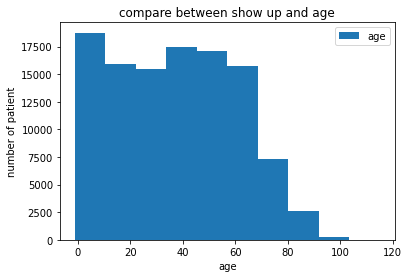

In [36]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.age.plot(kind='hist')
plt.xlabel("age")
plt.title('compare between show up and age')
plt.ylabel("number of patient")
plt.legend()

parent care more about children and people more than 60 stop taking care of them selfs

### does gender affect on patient that will come or not?

<AxesSubplot:ylabel='gender'>

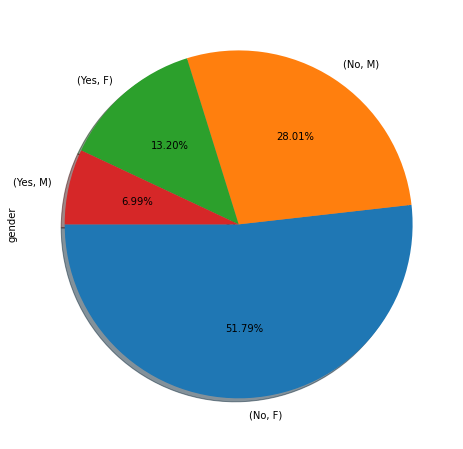

In [41]:
# df['Gender'].value_counts().plot(kind='pie',grid=True)
df.groupby('no_show')['gender'].value_counts().plot(autopct='%1.2f%%', shadow=True, startangle=180,kind='pie', figsize=(8, 8), grid=True)


from last graph we can see that Woman care a little more about their health than men.

### Receiving a sms affect on patient showing up or not?

In [ ]:
patient_come.sms_received.value_counts().plot(kind='bar',
                                              figsize=(20, 8), grid=True, alpha=0.5, label='patient came')
patient_didnot_come.sms_received.value_counts().plot(kind='bar',
                                                     figsize=(20, 8), grid=True,  color='r', alpha=0.5, label="patient didn't came")
plt.legend()


more than 60K of patient didn't received a sms but they came and who received a sms most of them didn't came <br>
this data of sms need to be reconsidering again

## Does other property affect on patient show up or not?

### alcoholism?

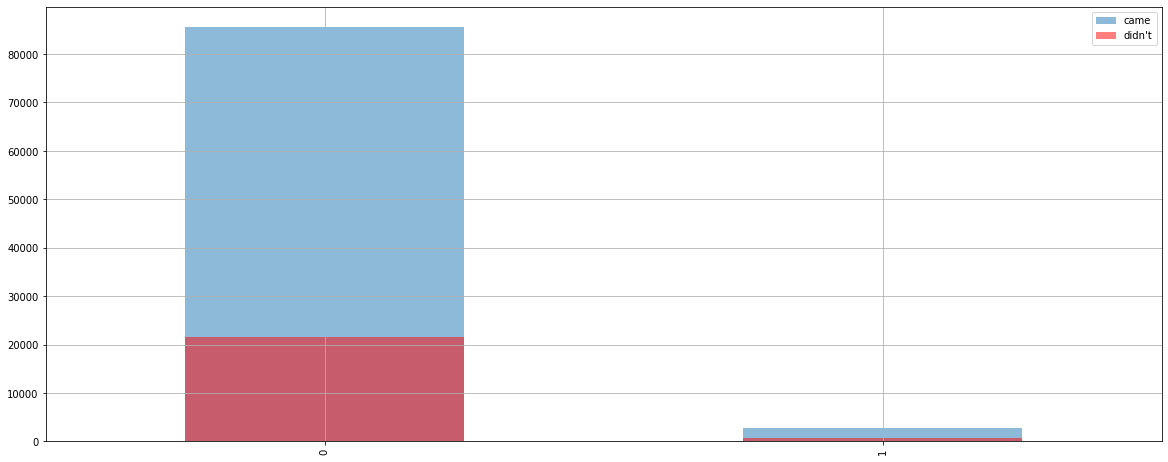

In [21]:
patient_properties('alcoholism', 'came', "didn't", 'bar')


#### hypertension

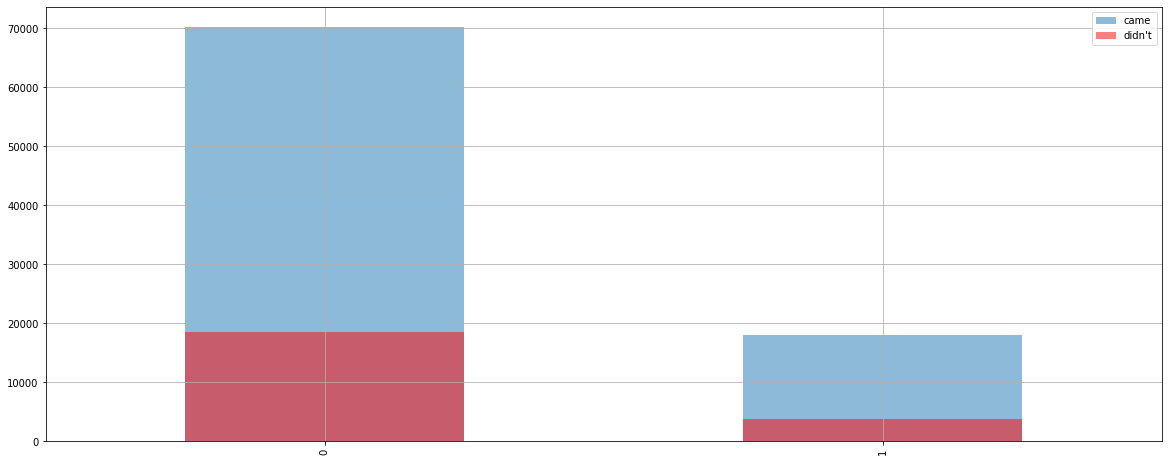

In [24]:
patient_properties('hypertension', 'show', "didn't show", 'bar')


from last graph we can see that number of people that have hypertension is low and don't affect in this data

#### diabetes

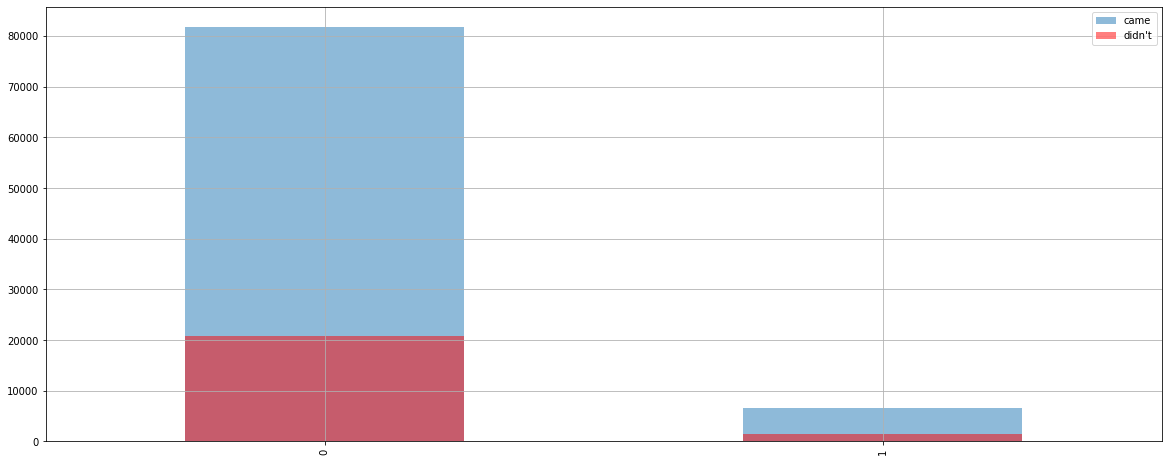

In [23]:
patient_properties('diabetes', 'show', "didn't show", 'bar')


from last graph we can see that number of people that have diabetes is low and don't affect in this data

#### neighbourhood

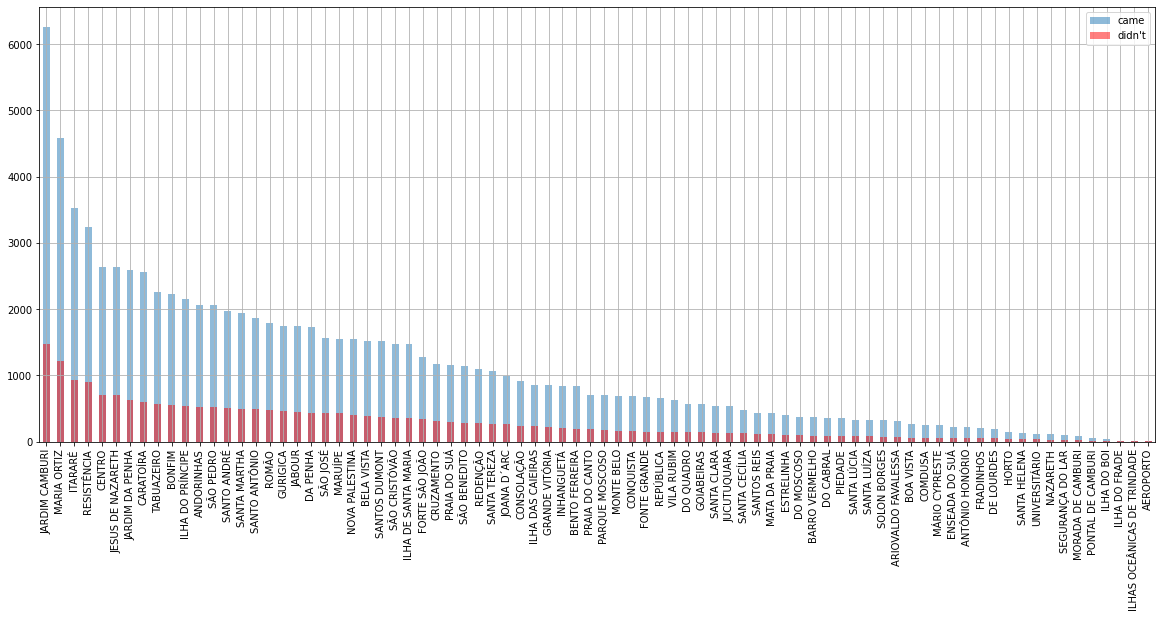

In [22]:
patient_properties('neighbourhood',  'show', "didn't show", 'bar')


patient from Jaroim Camburi and Maria Ortiz are the most patient that will came to their appointment

<a id='conclusions'></a>
## Conclusions
<ul>
<li>patient from Jaroim Camburi and Maria Ortiz has higher chance that they will came to their appointment<br></li>
<li>patient that less than 10 years old has higher chance that they will came to their appointment<br></li>
<li>woman care a little more to their health more than men<br></li>
<li>patient with </li>
<li>we should look again at sms data</li>
<li>patient_id, appointment_id,'scheduled_day, appointment_day not important column so i dropped it from data</li>
</ul>


## Limitations


no correlations between showing up and diabetes,hypertension and alcoholism.
<br>sms need to be look up again at this data

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])


1